# Intro
We will be training a reinforcement learning agent on the bipedal walker simulation as part of OpenAI's gym. We will need to interface correctly with this and create a TD3 baseline method, as well as a number of variants as specified in the report.

Installs required for this workflow were based on a distributed paradigm and may not function correctly when ran locally.

# Installs

In [0]:
!pip install gymnasium

Requirement already satisfied: gymnasium in /databricks/python3/lib/python3.8/site-packages (0.28.1)
Requirement already satisfied: typing-extensions>=4.3.0 in /databricks/python3/lib/python3.8/site-packages (from gymnasium) (4.5.0)
Requirement already satisfied: farama-notifications>=0.0.1 in /databricks/python3/lib/python3.8/site-packages (from gymnasium) (0.0.4)
Requirement already satisfied: numpy>=1.21.0 in /databricks/python3/lib/python3.8/site-packages (from gymnasium) (1.24.2)
Requirement already satisfied: jax-jumpy>=1.0.0 in /databricks/python3/lib/python3.8/site-packages (from gymnasium) (1.0.0)
Requirement already satisfied: importlib-metadata>=4.8.0 in /databricks/python3/lib/python3.8/site-packages (from gymnasium) (6.5.1)
Requirement already satisfied: cloudpickle>=1.2.0 in /databricks/python3/lib/python3.8/site-packages (from gymnasium) (1.6.0)
Requirement already satisfied: zipp>=0.5 in /databricks/python3/lib/python3.8/site-packages (from importlib-metadata>=4.8.0->gymnasium) (3.4.1)
 WARNING: You are using pip version 21.0.1; however, version 23.1.1 is available.
You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.

In [0]:
!pip install gymnasium[box2d]

Requirement already satisfied: gymnasium[box2d] in /databricks/python3/lib/python3.8/site-packages (0.28.1)
Requirement already satisfied: typing-extensions>=4.3.0 in /databricks/python3/lib/python3.8/site-packages (from gymnasium[box2d]) (4.5.0)
Requirement already satisfied: farama-notifications>=0.0.1 in /databricks/python3/lib/python3.8/site-packages (from gymnasium[box2d]) (0.0.4)
Requirement already satisfied: numpy>=1.21.0 in /databricks/python3/lib/python3.8/site-packages (from gymnasium[box2d]) (1.24.2)
Requirement already satisfied: jax-jumpy>=1.0.0 in /databricks/python3/lib/python3.8/site-packages (from gymnasium[box2d]) (1.0.0)
Requirement already satisfied: importlib-metadata>=4.8.0 in /databricks/python3/lib/python3.8/site-packages (from gymnasium[box2d]) (6.5.1)
Requirement already satisfied: cloudpickle>=1.2.0 in /databricks/python3/lib/python3.8/site-packages (from gymnasium[box2d]) (1.6.0)
Requirement already satisfied: box2d-py==2.3.5 in /databricks/python3/lib/python3.8/site-packages (from gymnasium[box2d]) (2.3.5)
Requirement already satisfied: pygame==2.1.3 in /databricks/python3/lib/python3.8/site-packages (from gymnasium[box2d]) (2.1.3)
Requirement already satisfied: swig==4.* in /databricks/python3/lib/python3.8/site-packages (from gymnasium[box2d]) (4.1.1)
Requirement already satisfied: zipp>=0.5 in /databricks/python3/lib/python3.8/site-packages (from importlib-metadata>=4.8.0->gymnasium[box2d]) (3.4.1)
 WARNING: You are using pip version 21.0.1; however, version 23.1.1 is available.
You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.

In [0]:
!pip install ffmpeg --upgrade

Requirement already satisfied: ffmpeg in /databricks/python3/lib/python3.8/site-packages (1.4)
 WARNING: You are using pip version 21.0.1; however, version 23.1.1 is available.
You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.

In [0]:
!pip install moviepy

Requirement already satisfied: moviepy in /databricks/python3/lib/python3.8/site-packages (1.0.3)
Requirement already satisfied: proglog<=1.0.0 in /databricks/python3/lib/python3.8/site-packages (from moviepy) (0.1.10)
Requirement already satisfied: imageio<3.0,>=2.5 in /databricks/python3/lib/python3.8/site-packages (from moviepy) (2.27.0)
Requirement already satisfied: requests<3.0,>=2.8.1 in /databricks/python3/lib/python3.8/site-packages (from moviepy) (2.25.1)
Requirement already satisfied: numpy>=1.17.3 in /databricks/python3/lib/python3.8/site-packages (from moviepy) (1.24.2)
Requirement already satisfied: tqdm<5.0,>=4.11.2 in /databricks/python3/lib/python3.8/site-packages (from moviepy) (4.59.0)
Requirement already satisfied: decorator<5.0,>=4.0.2 in /databricks/python3/lib/python3.8/site-packages (from moviepy) (4.4.2)
Requirement already satisfied: imageio-ffmpeg>=0.2.0 in /databricks/python3/lib/python3.8/site-packages (from moviepy) (0.4.8)
Requirement already satisfied: pillow>=8.3.2 in /databricks/python3/lib/python3.8/site-packages (from imageio<3.0,>=2.5->moviepy) (9.5.0)
Requirement already satisfied: urllib3<1.27,>=1.21.1 in /databricks/python3/lib/python3.8/site-packages (from requests<3.0,>=2.8.1->moviepy) (1.25.11)
Requirement already satisfied: certifi>=2017.4.17 in /databricks/python3/lib/python3.8/site-packages (from requests<3.0,>=2.8.1->moviepy) (2020.12.5)
Requirement already satisfied: chardet<5,>=3.0.2 in /databricks/python3/lib/python3.8/site-packages (from requests<3.0,>=2.8.1->moviepy) (4.0.0)
Requirement already satisfied: idna<3,>=2.5 in /databricks/python3/lib/python3.8/site-packages (from requests<3.0,>=2.8.1->moviepy) (2.10)
 WARNING: You are using pip version 21.0.1; however, version 23.1.1 is available.
You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.

# Imports

In [0]:
import gymnasium as gym
from gymnasium.wrappers import RecordEpisodeStatistics
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow.keras import layers
import os
from collections import deque
import keras
from keras.layers import Dense, Input

import datetime as dt
import copy
import pickle
from collections import defaultdict
import pandas as pd

tf.keras.backend.set_floatx('float32')

/databricks/python/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2)
 warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "

Out[6]:

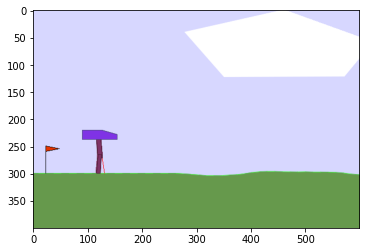

<matplotlib.image.AxesImage at 0x7f14b933ae80>

In [0]:


def time_now_string():
    return dt.datetime.now().strftime("%d/%m/%Y %H:%M:%S")

def save_object(obj, filename):
    with open(filename, 'wb') as outp:  
        pickle.dump(obj, outp)

def load_object(filename):
    with open(filename, 'rb') as outp:  
        object_ = pickle.load(outp)
    return object_

def set_seed(seed: int):
    """Set seed across random and numpy libraries"""
    random.seed(seed)
    np.random.seed(seed)
    return seed

def create_env(seed):
    # render_modes = ["human", "rgb_array", "ansi", "rgb_array_list"]
    base_env = gym.make("BipedalWalker-v3", hardcore=False, render_mode="rgb_array_list")
    # env = RescaleAction(base_env, min_action=0, max_action=1)
    # env = NormalizeObservation(env)

    # Reset Environment
    base_env.reset(seed=seed)

    return base_env

# Set Seed
seed = set_seed(123)

# Create Environment
env = create_env(seed)

# Render Environment
plt.imshow(env.render()[0])

In [0]:
#environment information 
num_parameters_recorded_per_states = env.observation_space.shape[0]
print("Bipedalwalker observe {} parameters per state.".format(num_parameters_recorded_per_states))

num_actions_per_step = env.action_space.shape[0]
upper_limit = env.action_space.high[0]
lower_limit = env.action_space.low[0]
print("To take a step in such an environment, {} individual actions are taken to move hip and knee ".format(num_actions_per_step))
print("Max Value of individual action ->  {}, Min Value of individual action ->  {}".format(upper_limit, lower_limit))
print("Reward range is  {}".format(env.reward_range))

Bipedalwalker observe 24 parameters per state.
To take a step in such an environment, 4 individual actions are taken to move hip and knee 
Max Value of individual action -> 1.0, Min Value of individual action -> -1.0
Reward range is (-inf, inf)

# Implementation

## Replay Buffer

In [0]:


class ReplayBuffer(object):
    # Replay experience buffer, where experiences are stored to sample for model training
    def __init__(self, max_size=200_000):
        """
        max_size: Size of the buffer, how many transitions can be stored before deleting old transitions. 
        """
        self.max_size = max_size
        self.buffer = deque(maxlen=self.max_size)
        
    def add(self, value_tuple):
        """
        Add values to buffer.
        The value tuple should be (state, next_state, action, reward, completed_flag)
        """
        self.buffer.append(value_tuple)
            
    def sample(self, batch_size):
        """ Sample experiences from the memory buffer
            batch_size: the amount of transitions to be randomly sampled at one time. 
        """
        ind = np.random.randint(0, len(self.buffer),  size=batch_size)
        batch_states, batch_next_states, batch_actions, batch_rewards, batch_dones = [], [], [], [], []
        for i in ind:
            state, next_state, action, reward, done = self.buffer[i]
            batch_states.append(np.array(state, copy=False))
            batch_next_states.append(np.array(next_state, copy=False))
            batch_actions.append(np.array(action, copy=False))
            batch_rewards.append(np.array(reward, copy=False))
            batch_dones.append(np.array(done, copy=False))
        return np.array(batch_states), np.array(batch_next_states), np.array(batch_actions), np.array(batch_rewards).reshape(-1, 1), np.array(batch_dones).reshape(-1, 1)

## Agent

In [0]:


class Actor(keras.Model):
    """Create actor network"""

    def __init__(self, state_dim, action_dim):

        """
       state_dim: Observation environment dimensions, this will be used to determine network input size.
       action_dim: Action dimensions, this will be used to determine network output.

        """
        super(Actor, self).__init__()
        self.inp_layer = Dense(
            state_dim,
        )
        self.layer_1 = Dense(
            400,
            activation="relu",
        )
        self.layer_2 = Dense(
            300,
            activation="relu",
        )
        self.out_layer = Dense(
            action_dim,
            activation="tanh",
        )

    def call(self, observation):
        x = self.inp_layer(observation)
        x = self.layer_1(x)
        x = self.layer_2(x)
        x = self.out_layer(x)
        return x


class Critic(keras.Model):
    """Creates two critic networks"""

    def __init__(self, state_dim, action_dim):
        """
    state_dim: The dimensions of the state the environment will produce.
    action_dim: The dimensions of the actions the environment can take.
        """
        super(Critic, self).__init__()
        # The First Critic NN
        self.inp_layer_1 = Dense(
            state_dim + action_dim,
        )
        self.layer_1_1 = Dense(
            400,
            activation="relu",
        )
        self.layer_2_1 = Dense(
            300,
            activation="relu",
        )
        self.out_layer_1 = Dense(
            1,
        )
        # The Second Critic NN
        self.inp_layer_2 = Dense(
            state_dim + action_dim,
        )
        self.layer_1_2 = Dense(
            400,
            activation="relu",
        )
        self.layer_2_2 = Dense(
            300,
            activation="relu",
        )
        self.out_layer_2 = Dense(
            1,
        )

    def call(self, observation, action):
        x0 = tf.concat([observation, action], 1)
        # forward propagate the first critic network
        x1 = self.inp_layer_1(x0)
        x1 = self.layer_1_1(x1)
        x1 = self.layer_2_1(x1)
        x1 = self.out_layer_1(x1)
        # forward propagate the second critic network
        x2 = self.inp_layer_2(x0)
        x2 = self.layer_1_2(x2)
        x2 = self.layer_2_2(x2)
        x2 = self.out_layer_2(x2)
        return x1, x2

    def Q1(self, observation, action):
        # Forward propogate to first critic network only
        x0 = tf.concat([observation, action], 1)
        x1 = self.inp_layer_1(x0)
        x1 = self.layer_1_1(x1)
        x1 = self.layer_2_1(x1)
        x1 = self.out_layer_1(x1)
        return x1


class TD3(object):
    def __init__(
        self,
        state_dim,
        action_dim,
        max_action,
        gamma=0.99,
        tau=0.005,
        noise_std=0.1,
        noise_clip=0.5,
        actor_train_interval=2,
        actor_lr=4e-4,
        critic_lr=4e-4,
        loss_function="MSE",
    ):

        """
         state_dim: The dimensions of the state the environment will produce.
                 This is the input for the Actor network and one of the inputs
                 for the Critic network.
         action_dim: The dimensions of the actions the environment can take.
                 This is the output for the Actor network and one of the inputs
                 for the Critic network.
         max_action: The maximum value for each action dimension.
         gamma: Future rewards discount factor.
         tau: The factor that the target networks are soft updated, equivalent to how much.
         noise_std: The scale factor to add noise to learning.
         noise_clip: The maximum noise that can be added to actions during
                 learning,
         expl_noise: The scale factor for noise during action selection.
         actor_train_interval: How often the actor network
                 is trained and target networks are updated.
         actor_lr: The learning rate used for gradient ascent of the Actor network.
         critic_lr: The learning rate used for gradient descent of the Critic network
         loss_function: can be set as MSE or Huber
        """

        self.actor = Actor(state_dim, action_dim)
        self.actor_target = Actor(state_dim, action_dim)
        for t, e in zip(
            self.actor_target.trainable_variables, self.actor.trainable_variables
        ):
            t.assign(e)
        self.actor_optimizer = tf.keras.optimizers.Adam(learning_rate=actor_lr)

        self.critic = Critic(state_dim, action_dim)
        self.critic_target = Critic(state_dim, action_dim)
        for t, e in zip(
            self.critic_target.trainable_variables, self.critic.trainable_variables
        ):
            t.assign(e)
        self.critic_optimizer = tf.keras.optimizers.Adam(learning_rate=actor_lr)

        if loss_function == "MSE":
            self.critic_loss_function = tf.keras.losses.MeanSquaredError()
        elif loss_function == "Huber":
            self.critic_loss_function = tf.keras.losses.Huber()

        self.action_dim = action_dim
        self.max_action = max_action
        self.gamma = gamma
        self.tau = tau
        self.noise_std = noise_std
        self.noise_clip = noise_clip
        self.actor_train_interval = actor_train_interval

        self.train_it = 0

    def select_action(self, state, noise: bool = False):
        # Action selection by the actor_network.
        state = state.reshape(1, -1)
        action = self.actor.call(state)[0].numpy()
        if noise:
            noise = tf.random.normal(action.shape, mean=0, stddev=self.noise_std)
            noise = tf.clip_by_value(noise, -self.noise_clip, self.noise_clip)
            action = action + noise
        action = tf.clip_by_value(action, -self.max_action, self.max_action)
        return action

    def explore(self, env, replay_buffer, explore_steps=10_000):
        explore_counter = 0
        done = True

        while explore_counter < explore_steps:
            if done:
                state, _ = env.reset()
                done = False

            action = env.action_space.sample()

            next_state, reward, terminal, truncated, info = env.step(action)
            done = terminal or truncated

            replay_buffer.add((state, next_state, action, reward, terminal))

            state = next_state
            explore_counter += 1

    def train(self, replay_buffer, batch_size=100):
        # training of the Actor and Critic networks.
        self.train_it += 1

        # create a sample of transitions
        (
            batch_states,
            batch_next_states,
            batch_actions,
            batch_rewards,
            batch_completes,
        ) = replay_buffer.sample(batch_size)

        # calculate a' and add noise
        next_actions = self.actor_target.call(batch_next_states)

        noise = tf.random.normal(next_actions.shape, mean=0, stddev=self.noise_std)
        noise = tf.clip_by_value(noise, -self.noise_clip, self.noise_clip)
        noisy_next_actions = tf.clip_by_value(
            next_actions + noise, -self.max_action, self.max_action
        )

        # calculate the min(Q(s', a')) from the two critic target networks
        target_q1, target_q2 = self.critic_target.call(
            batch_next_states, noisy_next_actions
        )
        target_q = tf.minimum(target_q1, target_q2)

        # calculate the target Q(s, a)
        td_targets = tf.stop_gradient(
            batch_rewards + (1 - batch_completes) * self.gamma * target_q
        )

        # Use gradient descent on the critic network
        trainable_critic_variables = self.critic.trainable_variables

        with tf.GradientTape(watch_accessed_variables=False) as tape:
            tape.watch(trainable_critic_variables)
            model_q1, model_q2 = self.critic(batch_states, batch_actions)
            critic_loss = self.critic_loss_function(
                td_targets, model_q1
            ) + self.critic_loss_function(td_targets, model_q2)
        critic_grads = tape.gradient(critic_loss, trainable_critic_variables)
        self.critic_optimizer.apply_gradients(
            zip(critic_grads, trainable_critic_variables)
        )

        # Use gradient ascent on the actor network according to train_interval
        if self.train_it % self.actor_train_interval == 0:
            trainable_actor_variables = self.actor.trainable_variables

            with tf.GradientTape(watch_accessed_variables=False) as tape:
                tape.watch(trainable_actor_variables)
                actor_loss = -tf.reduce_mean(
                    self.critic.Q1(batch_states, self.actor(batch_states))
                )
            actor_grads = tape.gradient(actor_loss, trainable_actor_variables)
            self.actor_optimizer.apply_gradients(
                zip(actor_grads, trainable_actor_variables)
            )

            # update the weights in the critic and actor target models
            for t, e in zip(
                self.critic_target.trainable_variables, self.critic.trainable_variables
            ):
                t.assign(t * (1 - self.tau) + e * self.tau)

            for t, e in zip(
                self.actor_target.trainable_variables, self.actor.trainable_variables
            ):
                t.assign(t * (1 - self.tau) + e * self.tau)

    def save(self, video_render_path, agent_name, episode_idx):
        # Save the weights of all the models.
        self.actor.save_weights(
            "{}models/{}/actor_ep{}".format(video_render_path, agent_name, episode_idx)
        )
        self.actor_target.save_weights(
            "{}models/{}/actor_target_ep{}".format(video_render_path, agent_name, episode_idx)
        )

        self.critic.save_weights(
            "{}models/{}/critic_ep{}".format(video_render_path, agent_name, episode_idx)
        )
        self.critic_target.save_weights(
            "{}models/{}/critic_target_ep{}".format(video_render_path, agent_name, episode_idx)
        )

# Store Details
Run a test for 100 episodes to check these.


In [0]:
# File System Parameters
ROOT = '.' 

agent_name = 'td3_baseline_1000_3'

video_render_path = f'{ROOT}/{agent_name}/'

print(f'{video_render_path = }')

video_render_path = '/dbfs/DataScience/ch_test_dir/RL/td3_baseline_1000_3/'

# Baseline Run

In [0]:
# Get Start Time
start_time = time_now_string()

# initialise the environment
env = create_env(seed=123)
#record statistics 
env = gym.wrappers.RecordEpisodeStatistics(env, deque_size= 1_000_000)

# Get action & state details
action_dim = env.action_space.shape[0]
state_dim = env.observation_space.shape[0]
max_action = float(env.action_space.high[0])

# initialise the replay buffer
replay_buffer = ReplayBuffer(max_size=200_000)
# initialise the policy
policy = TD3(state_dim, action_dim, max_action)

# Set Reward Checkpoints to store details
performance_checkpoints = [-150.0, 0.0, 50.0, 100.0, 200.0, 250.0, 300.0, 500.0]

max_episodes = 1000
total_timesteps = 0
eval_freq = 10
episode_num = 0
episode_reward = 0
done = True

# Store actions for analysis
record_episode_actions_log = defaultdict(list)

running_average = []

# Run Exploration
print(f'{time_now_string()} Starting Exploration')

explore_steps = 50_000

policy.explore(env, replay_buffer, explore_steps)

print(f'{time_now_string()} Completed Exploration Steps: {explore_steps}')

while episode_num < max_episodes:

	if done:

    # collect actions of some episode to use them to analyze algorithm performance
		record_episode_actions = False
		if episode_num % 10 == 0:
			record_episode_actions = True

		# print the results at the end of the episode
		if total_timesteps != 0 and episode_num % 100 == 0:
			print('{} Episode: {}, Total Timesteps: {:,}, Episode Timesteps: {:,}, Episode Reward: {:.2f}'.format(
				time_now_string(),
				episode_num,
				total_timesteps,
				episode_timesteps,
				episode_reward
				)
        )

		if episode_num % eval_freq == 0 and episode_num > 0: 
			moving_average_score = np.mean(running_average[-100:])
			print(f'Episode: {episode_num}. Eval Metric: {moving_average_score:.2f}')

	  # save the model    
		if episode_num % 100 == 0:
			print('Saving Details.')
			policy.save(video_render_path, agent_name, episode_num)

			# Continually save down all results every 100 episodes
			ep_rewards = np.concatenate(list(env.return_queue))
			ep_duration = np.concatenate(list(env.length_queue))
			ep_actions = record_episode_actions_log
			
			policy.save(video_render_path, agent_name, 'final_policy')
			
			save_object(ep_rewards, video_render_path+f"ep_rewards_{episode_num}")
			save_object(ep_duration, video_render_path+f"ep_duration_{episode_num}")
			save_object(ep_actions, video_render_path+f"ep_actions_{episode_num}")


		state, _ = env.reset()

		done = False
		running_average.append(episode_reward)
	
		episode_reward = 0
		episode_timesteps = 0
		episode_num += 1


	else: # select an action from the actor network with noise
		action = policy.select_action(state, noise=True).numpy()
		if record_episode_actions:
			record_episode_actions_log[episode_num].append(action)

	# the agent plays the action
		next_state, reward, terminal, truncated, info = env.step(action)
 
		done = terminal or truncated

	# add to the total episode reward
		episode_reward += reward

	# add to the memory buffer
		replay_buffer.add((state, next_state, action, reward, terminal))

	# update the state, episode timestep and total timestep
		state = next_state
		episode_timesteps += 1
		total_timesteps += 1

	# train after the first episode
		if total_timesteps > 0:
			policy.train(replay_buffer)
    
print('Saving Details.')
policy.save(video_render_path, agent_name, episode_num)

# Continually save down all results every 100 episodes
ep_rewards = np.concatenate(list(env.return_queue))
ep_duration = np.concatenate(list(env.length_queue))
ep_actions = record_episode_actions_log

policy.save(video_render_path, agent_name, 'final_policy')

save_object(ep_rewards, video_render_path+f"ep_rewards_{episode_num}")
save_object(ep_duration, video_render_path+f"ep_duration_{episode_num}")
save_object(ep_actions, video_render_path+f"ep_actions_{episode_num}")

22/04/2023 13:06:01 Starting Exploration
22/04/2023 13:11:28 Completed Exploration Steps: 50000
Saving Details.
Episode: 10. Eval Metric: -101.81
Episode: 20. Eval Metric: -121.38
Episode: 30. Eval Metric: -126.81
Episode: 40. Eval Metric: -125.46
Episode: 50. Eval Metric: -124.03
Episode: 60. Eval Metric: -122.11
Episode: 70. Eval Metric: -120.26
Episode: 80. Eval Metric: -118.21
Episode: 90. Eval Metric: -116.85
22/04/2023 13:24:30 Episode: 100, Total Timesteps: 16,168, Episode Timesteps: 45, Episode Reward: -105.20
Episode: 100. Eval Metric: -115.59
Saving Details.
Episode: 110. Eval Metric: -115.96
Episode: 120. Eval Metric: -112.26
Episode: 130. Eval Metric: -108.75
Episode: 140. Eval Metric: -108.02
Episode: 150. Eval Metric: -106.84
Episode: 160. Eval Metric: -105.85
Episode: 170. Eval Metric: -105.16
Episode: 180. Eval Metric: -105.67
Episode: 190. Eval Metric: -106.00
22/04/2023 13:32:22 Episode: 200, Total Timesteps: 25,942, Episode Timesteps: 161, Episode Reward: -135.95
Episode: 200. Eval Metric: -107.05
Saving Details.
Episode: 210. Eval Metric: -109.28
Episode: 220. Eval Metric: -109.72
Episode: 230. Eval Metric: -110.68
Episode: 240. Eval Metric: -111.58
Episode: 250. Eval Metric: -112.88
Episode: 260. Eval Metric: -114.76
Episode: 270. Eval Metric: -116.82
Episode: 280. Eval Metric: -118.25
Episode: 290. Eval Metric: -119.95
22/04/2023 14:10:43 Episode: 300, Total Timesteps: 73,131, Episode Timesteps: 1,600, Episode Reward: -65.77
Episode: 300. Eval Metric: -118.23
Saving Details.
Episode: 310. Eval Metric: -113.62
Episode: 320. Eval Metric: -111.15
Episode: 330. Eval Metric: -106.93
Episode: 340. Eval Metric: -103.03
Episode: 350. Eval Metric: -96.19
Episode: 360. Eval Metric: -83.57
Episode: 370. Eval Metric: -73.32
Episode: 380. Eval Metric: -67.48
Episode: 390. Eval Metric: -61.53
22/04/2023 16:02:04 Episode: 400, Total Timesteps: 203,049, Episode Timesteps: 1,600, Episode Reward: 98.73
Episode: 400. Eval Metric: -51.95
Saving Details.
Episode: 410. Eval Metric: -29.37
Episode: 420. Eval Metric: 1.11
Episode: 430. Eval Metric: 29.15
Episode: 440. Eval Metric: 59.05
Episode: 450. Eval Metric: 90.55
Episode: 460. Eval Metric: 116.79
Episode: 470. Eval Metric: 145.75
Episode: 480. Eval Metric: 175.51
Episode: 490. Eval Metric: 193.70
22/04/2023 17:49:39 Episode: 500, Total Timesteps: 318,009, Episode Timesteps: 1,064, Episode Reward: 272.86
Episode: 500. Eval Metric: 221.12
Saving Details.
Episode: 510. Eval Metric: 234.07
Episode: 520. Eval Metric: 239.38
Episode: 530. Eval Metric: 245.82
Episode: 540. Eval Metric: 252.10
Episode: 550. Eval Metric: 251.99
Episode: 560. Eval Metric: 253.41
Episode: 570. Eval Metric: 246.98
Episode: 580. Eval Metric: 248.83
Episode: 590. Eval Metric: 263.45
22/04/2023 19:19:02 Episode: 600, Total Timesteps: 413,370, Episode Timesteps: 898, Episode Reward: 285.01
Episode: 600. Eval Metric: 265.11
Saving Details.
Episode: 610. Eval Metric: 257.71
Episode: 620. Eval Metric: 252.02
Episode: 630. Eval Metric: 247.72
Episode: 640. Eval Metric: 243.14
Episode: 650. Eval Metric: 246.48
Episode: 660. Eval Metric: 248.43
Episode: 670. Eval Metric: 254.89
Episode: 680. Eval Metric: 256.44
Episode: 690. Eval Metric: 260.36
22/04/2023 20:30:34 Episode: 700, Total Timesteps: 490,130, Episode Timesteps: 799, Episode Reward: 300.39
Episode: 700. Eval Metric: 261.89
Saving Details.
Episode: 710. Eval Metric: 272.24
Episode: 720. Eval Metric: 280.97
Episode: 730. Eval Metric: 288.23
Episode: 740. Eval Metric: 295.52
Episode: 750. Eval Metric: 296.37
Episode: 760. Eval Metric: 292.49
Episode: 770. Eval Metric: 296.20
Episode: 780. Eval Metric: 300.23
Episode: 790. Eval Metric: 300.83
22/04/2023 21:40:48 Episode: 800, Total Timesteps: 564,933, Episode Timesteps: 742, Episode Reward: 305.12
Episode: 800. Eval Metric: 300.98
Saving Details.
Episode: 810. Eval Metric: 301.34
Episode: 820. Eval Metric: 301.59
Episode: 830. Eval Metric: 301.78
Episode: 840. Eval Metric: 300.97
Episode: 850. Eval Metric

# Prioritised Replay Experience Agent

Updates are required for the replay buffer and the agent.

In [ ]:
class ReplayBuffer(object):
    # The memory to store transitions as the agent plays the environment
    def __init__(self, max_size=200_000, td_error_prioritization: bool = False):

        self.max_size = max_size
        self.buffer = deque(maxlen=self.max_size)
        self.td_loss = deque(maxlen=self.max_size)
        self.td_error_prioritization = td_error_prioritization
        
    def add(self, value_tuple, td_error=0):

        self.buffer.append(value_tuple)
        if self.td_error_prioritization:
            self.td_loss.append(td_error)
            
    def sample(self, batch_size):

        if self.td_error_prioritization:
            weights = self.td_loss / sum(self.td_loss)  
            batch_indices = np.random.choice(range(len(self.buffer)), size=self.batch_size, p = weights)

        else:
            ind = np.random.randint(0, len(self.buffer),  size=batch_size)

        batch_states, batch_next_states, batch_actions, batch_rewards, batch_dones = [], [], [], [], []
        for i in ind:
            state, next_state, action, reward, done = self.buffer[i]
            batch_states.append(np.array(state, copy=False))
            batch_next_states.append(np.array(next_state, copy=False))
            batch_actions.append(np.array(action, copy=False))
            batch_rewards.append(np.array(reward, copy=False))
            batch_dones.append(np.array(done, copy=False))
        return np.array(batch_states), np.array(batch_next_states), np.array(batch_actions), np.array(batch_rewards).reshape(-1, 1), np.array(batch_dones).reshape(-1, 1)
    
    
    
class TD3(object):
    def __init__(
        self,
        state_dim,
        action_dim,
        max_action,
        gamma=0.99,
        tau=0.005,
        noise_std=0.1,
        noise_clip=0.5,
        actor_train_interval=2,
        actor_lr=4e-4,
        critic_lr=4e-4,
        loss_function="MSE",
        tdl_priority=False
    ):

        """
        Args:
                state_dim: The dimensions of the state the environment will produce.
                        This is the input for the Actor network and one of the inputs
                        for the Critic network.
                action_dim: The dimensions of the actions the environment can take.
                        This is the output for the Actor network and one of the inputs
                        for the Critic network.
                max_action: The maximum value for each action dimension.
                gamma: Future rewards discount factor.
                tau: The factor that the target networks are soft updated, equivalent to how much.
                noise_std: The scale factor to add noise to learning.
                noise_clip: The maximum noise that can be added to actions during
                        learning,
                expl_noise: The scale factor for noise during action selection.
                actor_train_interval: How often the actor network
                        is trained and target networks are updated.
                actor_lr: The learning rate used for gradient ascent of the Actor network.
                critic_lr: The learning rate used for gradient descent of the Critic network
                loss_function: can be set as MSE or Huber
        """

        self.actor = Actor(state_dim, action_dim)
        self.actor_target = Actor(state_dim, action_dim)
        for t, e in zip(
            self.actor_target.trainable_variables, self.actor.trainable_variables
        ):
            t.assign(e) 
        self.actor_optimizer = tf.keras.optimizers.Adam(learning_rate=actor_lr)

        self.critic = Critic(state_dim, action_dim)
        self.critic_target = Critic(state_dim, action_dim)
        for t, e in zip(
            self.critic_target.trainable_variables, self.critic.trainable_variables
        ):
            t.assign(e)
        self.critic_optimizer = tf.keras.optimizers.Adam(learning_rate=actor_lr)

        if loss_function == "MSE":
            self.critic_loss_function = tf.keras.losses.MeanSquaredError()
        elif loss_function == "Huber":
            self.critic_loss_function = tf.keras.losses.Huber()

        self.action_dim = action_dim
        self.max_action = max_action
        self.gamma = gamma
        self.tau = tau
        self.noise_std = noise_std
        self.noise_clip = noise_clip
        self.actor_train_interval = actor_train_interval
        self.tdl_priority = tdl_priority

        self.train_it = 0

    def select_action(self, state, noise: bool = False):
        # Action selection by the actor_network.
        state = state.reshape(1, -1)
        action = self.actor.call(state)[0].numpy()
        if noise:
            noise = tf.random.normal(action.shape, mean=0, stddev=self.noise_std)
            noise = tf.clip_by_value(noise, -self.noise_clip, self.noise_clip)
            action = action + noise
        action = tf.clip_by_value(action, -self.max_action, self.max_action)
        return action

    def explore(self, env, replay_buffer, explore_steps=10_000, td_error_prioritization: bool = False):
        explore_counter = 0
        done = True

        

        while explore_counter < explore_steps:
            if done:
                state, _ = env.reset()
                done = False

            action = env.action_space.sample()

            next_state, reward, terminal, truncated, info = env.step(action)
            done = terminal or truncated

            if td_error_prioritization:
                replay_buffer.add((state, next_state, action, reward, terminal), td_error=1)

            else:
                replay_buffer.add((state, next_state, action, reward, terminal))

            state = next_state
            explore_counter += 1

    def train(self, observation, replay_buffer, batch_size=100):
        # training of the Actor and Critic networks.
        self.train_it += 1

        if self.tdl_priority:
          # batch_rewards + (1 - batch_completes) * self.gamma * target_q

            prev_state, state, action, reward, complete_flag = observation
            next_action = self.select_action(state, noise=True).numpy()
            next_state_prediction = min(self.critic_target.call(
            [state], [next_action]
            )
            )
            y = reward + (1 - complete_flag) * self.gamma * next_state_prediction

            y_chapeau = self.critic.call([prev_state], [action])
            td_loss = abs(y - y_chapeau).numpy()

        else:
          
          td_loss = 0

        #store transition in buffer
        replay_buffer.add(observation, td_loss)

        # create a sample of transitions
        (
            batch_states,
            batch_next_states,
            batch_actions,
            batch_rewards,
            batch_completes,
        ) = replay_buffer.sample(batch_size)

        # calculate a' and add noise
        next_actions = self.actor_target.call(batch_next_states)

        noise = tf.random.normal(next_actions.shape, mean=0, stddev=self.noise_std)
        noise = tf.clip_by_value(noise, -self.noise_clip, self.noise_clip)
        noisy_next_actions = tf.clip_by_value(
            next_actions + noise, -self.max_action, self.max_action
        )

        # calculate the min(Q(s', a')) from the two critic target networks
        target_q1, target_q2 = self.critic_target.call(
            batch_next_states, noisy_next_actions
        )
        target_q = tf.minimum(target_q1, target_q2)

        # calculate the target Q(s, a)
        td_targets = tf.stop_gradient(
            batch_rewards + (1 - batch_completes) * self.gamma * target_q
        )

        # Use gradient descent on the critic network
        trainable_critic_variables = self.critic.trainable_variables

        with tf.GradientTape(watch_accessed_variables=False) as tape:
            tape.watch(trainable_critic_variables)
            model_q1, model_q2 = self.critic(batch_states, batch_actions)
            critic_loss = self.critic_loss_function(
                td_targets, model_q1
            ) + self.critic_loss_function(td_targets, model_q2)
        critic_grads = tape.gradient(critic_loss, trainable_critic_variables)
        self.critic_optimizer.apply_gradients(
            zip(critic_grads, trainable_critic_variables)
        )

        # Use gradient ascent on the actor network according to train_interval
        if self.train_it % self.actor_train_interval == 0:
            trainable_actor_variables = self.actor.trainable_variables

            with tf.GradientTape(watch_accessed_variables=False) as tape:
                tape.watch(trainable_actor_variables)
                actor_loss = -tf.reduce_mean(
                    self.critic.Q1(batch_states, self.actor(batch_states))
                )
            actor_grads = tape.gradient(actor_loss, trainable_actor_variables)
            self.actor_optimizer.apply_gradients(
                zip(actor_grads, trainable_actor_variables)
            )

            # update the weights in the critic and actor target models
            for t, e in zip(
                self.critic_target.trainable_variables, self.critic.trainable_variables
            ):
                t.assign(t * (1 - self.tau) + e * self.tau)

            for t, e in zip(
                self.actor_target.trainable_variables, self.actor.trainable_variables
            ):
                t.assign(t * (1 - self.tau) + e * self.tau)

    def save(self, video_render_path, agent_name, episode_idx):
        # Save the weights of all the models.
        self.actor.save_weights(
            "{}models/{}/actor_ep{}".format(video_render_path, agent_name, episode_idx)
        )
        self.actor_target.save_weights(
            "{}models/{}/actor_target_ep{}".format(video_render_path, agent_name, episode_idx)
        )

        self.critic.save_weights(
            "{}models/{}/critic_ep{}".format(video_render_path, agent_name, episode_idx)
        )
        self.critic_target.save_weights(
            "{}models/{}/critic_target_ep{}".format(video_render_path, agent_name, episode_idx)
        )

In [ ]:
agent_name = 'td3_priority_1000'

video_render_path = f'{ROOT}/{agent_name}/'

print(f'{video_render_path = }')

start_time = time_now_string()

# initialise the environment
env = create_env(seed=123)
#record statistics 
env = gym.wrappers.RecordEpisodeStatistics(env, deque_size= 1_000_000)

# Get action & state details
action_dim = env.action_space.shape[0]
state_dim = env.observation_space.shape[0]
max_action = float(env.action_space.high[0])

# initialise the replay buffer
replay_buffer = ReplayBuffer(max_size=200_000)
# initialise the policy
policy = TD3(state_dim, action_dim, max_action, tdl_priority=True)

performance_checkpoints = [-150.0, 0.0, 50.0, 100.0, 200.0, 250.0, 300.0, 500.0]

max_episodes = 1000
total_timesteps = 0
eval_freq = 10
save_freq = 1e5
episode_num = 0
episode_reward = 0
done = True

# Store actions for analysis
record_episode_actions_log = defaultdict(list)

running_average = []

# Run Exploration
print(f'{time_now_string()} Starting Exploration')

explore_steps = 50_000

policy.explore(env, replay_buffer, explore_steps)

print(f'{time_now_string()} Completed Exploration Steps: {explore_steps}')

while episode_num < max_episodes:

	if done:

    # collect actions of some episode to use them to analyze algorithm performance
		record_episode_actions = False
		if episode_num % 10 == 0:
			record_episode_actions = True

		# print the results at the end of the episode
		if total_timesteps != 0 and episode_num % 100 == 0:
			print('{} Episode: {}, Total Timesteps: {:,}, Episode Timesteps: {:,}, Episode Reward: {:.2f}'.format(
				time_now_string(),
				episode_num,
				total_timesteps,
				episode_timesteps,
				episode_reward
				)
        )

		if episode_num % eval_freq == 0 and episode_num > 0: 
			moving_average_score = np.mean(running_average[-100:])
			print(f'Episode: {episode_num}. Eval Metric: {moving_average_score:.2f}')

		if episode_reward > min(performance_checkpoints) or episode_num % 100 == 0:
				checkpoint = min(performance_checkpoints)

				print(f'Storing Video for checkpoint: {checkpoint}')

				# Store Video
				save_object(env, video_render_path+'_'+str(episode_num))
				
				# Update list, remove smallest element
				if episode_reward > min(performance_checkpoints):
					performance_checkpoints.remove(checkpoint)

	  # save the model    
		if episode_num % 100 == 0:
			print('Saving Details.')
			policy.save(video_render_path, agent_name, episode_num)

			# Continually save down all results every 100 episodes
			ep_rewards = np.concatenate(list(env.return_queue))
			ep_duration = np.concatenate(list(env.length_queue))
			ep_actions = record_episode_actions_log
			
			policy.save(video_render_path, agent_name, 'final_policy')
			
			save_object(ep_rewards, video_render_path+f"ep_rewards_{episode_num}")
			save_object(ep_duration, video_render_path+f"ep_duration_{episode_num}")
			save_object(ep_actions, video_render_path+f"ep_actions_{episode_num}")


		state, _ = env.reset()

		done = False
		running_average.append(episode_reward)
	
		episode_reward = 0
		episode_timesteps = 0
		episode_num += 1


	else: # select an action from the actor network with noise
		action = policy.select_action(state, noise=True).numpy()
		if record_episode_actions:
			record_episode_actions_log[episode_num].append(action)

	# the agent plays the action
		next_state, reward, terminal, truncated, info = env.step(action)
 
		done = terminal or truncated

	# add to the total episode reward
		episode_reward += reward

		policy.train(observation=(state, next_state, action, reward, terminal), replay_buffer=replay_buffer)

	# update the state, episode timestep and total timestep
		state = next_state
		episode_timesteps += 1
		total_timesteps += 1
		eval_counter += 1
    
print('Saving Details.')
policy.save(video_render_path, agent_name, episode_num)

# Continually save down all results every 100 episodes
ep_rewards = np.concatenate(list(env.return_queue))
ep_duration = np.concatenate(list(env.length_queue))
ep_actions = record_episode_actions_log

policy.save(video_render_path, agent_name, 'final_policy')

save_object(ep_rewards, video_render_path+f"ep_rewards_{episode_num}")
save_object(ep_duration, video_render_path+f"ep_duration_{episode_num}")
save_object(ep_actions, video_render_path+f"ep_actions_{episode_num}")

# Other Variants

Other variants require minor hyperparameter updates to the code as follows:
* Huber Loss, set loss='Huber' on creating the agent
* Small buffer, set max_size=20_000 on creating the replay buffer
* Hardcore mode, set hardcore=True on creating the environment

Additional variants where tested with varied learning rate and delayed updated parameters, but did not converge.